# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis with pandas. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [176]:
# Import the appropriate libraries with aliases
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
# Create two new dataframes
north_df = pd.read_csv("./NorthCallCenter.csv")
south_df = pd.read_csv("./SouthCallCenter.csv")
combined_df = pd.concat([north_df, south_df], axis=0, keys=['North', 'South'])
combined_df

Unnamed: 0 Branch     Call Purpose Time Block Incoming or Outgoing  \
North 0             0  North        Complaint    9:00 AM             Incoming   
      1             1  North    Sales Support   11:00 AM             Incoming   
      2             2  North    Sales Support   11:00 AM             Incoming   
      3             3  North    Sales Support    4:00 PM             Incoming   
      4             4  North  Product Support   12:00 PM             Incoming   
...               ...    ...              ...        ...                  ...   
South 309         309  South  Product Support    5:00 PM             Outgoing   
      310         310  South  Product Support    5:00 PM             Outgoing   
      311         311  South  Product Support    5:00 PM             Outgoing   
      312         312  South  Product Support    5:00 PM             Outgoing   
      313         313  South  Product Support    5:00 PM             Outgoing   

          Queue  Rep ID Sale  Lost Call  Abandoned  Busy Minutes  \
North 0       B   Brent   NO          0          1             9   
      1       A     Cam   NO          0          0            11   
      2       B    Todd   NO          0          0             9   
      3       B   Brent   NO          0          0            11   
      4       B   Brent   NO          0          0             8   
...         ...     ...  ...        ...        ...           ...   
South 309     D   Helga   NO          0          0            10   
      310     C   Susan   NO          0          0            12   
      311     C   Sandy   NO          0          0             9   
      312     C    Eric   NO          0          0            10   
      313     D  George   NO          0          0            10   

           Not Ready Minutes  Incoming Wait Time  During Call Wait Time  Calls  
North 0                    2                 1.0                      4      1  
      1                    1                 1.0                      3      1  
      2                    3                 1.0                      3      1  
      3                    2                 1.0                      4      1  
      4                    2                 1.0                      4      1  
...                      ...                 ...                    ...    ...  
South 309                  3                 NaN                      4      1  
      310                  3                 NaN                      4      1  
      311                  3                 NaN                      4      1  
      312                  1                 NaN                      2      1  
      313                  2                 NaN                      3      1  

[559 rows x 15 columns]

#### EDA Question 1A:  How many reps are in the North branch?  

## Task 1: Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. Use the code blocks below to begin cleaning your data. At the end of the section, record your answers.

In [177]:
# EDA Question 1A solution below:
total_rep_id_north = north_df["Unnamed: 0"].count()
print(total_rep_id_north)

245


#### EDA Question 1B:  How many reps are in the South branch?  

In [178]:
# EDA Question 1B solution Below:
total_rep_id_south = south_df["Unnamed: 0"].count()
print(total_rep_id_south)

314


#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [179]:
# EDA Question 2A solution Below:
# Calculate the average of the specified columns
av_north = north_df[["Busy Minutes", "Not Ready Minutes", "Incoming Wait Time", "During Call Wait Time"]].mean()
print(av_north)

Busy Minutes             9.987755
Not Ready Minutes        1.914286
Incoming Wait Time       3.048780
During Call Wait Time    2.967347
dtype: float64


#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [180]:
# EDA Question 2B solution Below:
av_south = south_df[["Busy Minutes", "Not Ready Minutes", "Incoming Wait Time", "During Call Wait Time"]].mean()
print(av_south)

Busy Minutes             10.054140
Not Ready Minutes         1.910828
Incoming Wait Time        3.000000
During Call Wait Time     3.076433
dtype: float64


#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [181]:
# EDA Question 3 solution Below:
phones_combined = combined_df.groupby("Time Block")["Calls"].sum()
phones_combined

Time Block
10:00 AM     99
11:00 AM     56
12:00 PM    120
1:00 PM      40
2:00 PM      65
3:00 PM      73
4:00 PM      53
5:00 PM      43
9:00 AM      10
Name: Calls, dtype: int64

##### Record your answers for the EDA section below:
- 1a) Reps in the North Branch = 245
- 1b) Reps in the South Branch = 314


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 9.98
> - Not Ready Minutes = 1.91

> - Incoming Wait Time = 3.04
> - During Call Wait Time = 2.96

- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.05
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.00
> - During Call Wait Time = 3.07
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 10
> - 10:00AM  = 99
> - 11:00AM  = 56
> - 12:00PM  = 120
> - 1:00PM   = 40
> - 2:00PM   = 65
> - 3:00PM   = 73
> - 4:00PM   = 53
> - 5:00PM   = 43



## Task 2: Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?

In [182]:
# Question 1 solution below
des_cdf = combined_df.describe()
des_cdf

,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
count,559.000000,559.000000,559.000000,559.000000,559.000000,208.000000,559.000000,559.0
mean,141.379249,0.028623,0.019678,10.025045,1.912343,3.019231,3.028623,1.0
std,84.340108,0.166893,0.139016,1.405091,0.821644,1.365417,0.831225,0.0
min,0.000000,0.000000,0.000000,8.000000,1.000000,1.000000,2.000000,1.0
25%,69.500000,0.000000,0.000000,9.000000,1.000000,2.000000,2.000000,1.0
50%,139.000000,0.000000,0.000000,10.000000,2.000000,3.000000,3.000000,1.0
75%,209.000000,0.000000,0.000000,11.000000,3.000000,4.000000,4.000000,1.0
max,313.000000,1.000000,1.000000,12.000000,3.000000,5.000000,4.000000,1.0


In [183]:
miss_cdf = combined_df.isna()
miss_cdf

Unnamed: 0  Branch  Call Purpose  Time Block  Incoming or Outgoing  \
North 0         False   False         False       False                 False   
      1         False   False         False       False                 False   
      2         False   False         False       False                 False   
      3         False   False         False       False                 False   
      4         False   False         False       False                 False   
...               ...     ...           ...         ...                   ...   
South 309       False   False         False       False                 False   
      310       False   False         False       False                 False   
      311       False   False         False       False                 False   
      312       False   False         False       False                 False   
      313       False   False         False       False                 False   

           Queue  Rep ID   Sale  Lost Call  Abandoned  Busy Minutes  \
North 0    False   False  False      False      False         False   
      1    False   False  False      False      False         False   
      2    False   False  False      False      False         False   
      3    False   False  False      False      False         False   
      4    False   False  False      False      False         False   
...          ...     ...    ...        ...        ...           ...   
South 309  False   False  False      False      False         False   
      310  False   False  False      False      False         False   
      311  False   False  False      False      False         False   
      312  False   False  False      False      False         False   
      313  False   False  False      False      False         False   

           Not Ready Minutes  Incoming Wait Time  During Call Wait Time  Calls  
North 0                False               False                  False  False  
      1                False               False                  False  False  
      2                False               False                  False  False  
      3                False               False                  False  False  
      4                False               False                  False  False  
...                      ...                 ...                    ...    ...  
South 309              False                True                  False  False  
      310              False                True                  False  False  
      311              False                True                  False  False  
      312              False                True                  False  False  
      313              False                True                  False  False  

[559 rows x 15 columns]

#### Record your answer below:

> Your Answer: There is not any missing data just 2 possible outcomes, but if there was any missing data 'fill' would work best for this table.

#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?

In [184]:
# Cleaning Question 2 solution below:

##### Record your answer by below:
> Your Answer: I just rectified it as the outcome is either yes or no for the sale column, but the system would interpret it as true or false.

#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?

In [185]:
# Cleaning Question 3 solution below:
clean_ndf = north_df.duplicated()
clean_ndf

0      False
1      False
2      False
3      False
4      False
       ...  
240    False
241    False
242    False
243    False
244    False
Length: 245, dtype: bool

In [186]:
# Cleaning Question 3 solution below:
clean_sdf = south_df.duplicated()
clean_sdf

0      False
1      False
2      False
3      False
4      False
       ...  
309    False
310    False
311    False
312    False
313    False
Length: 314, dtype: bool

##### Record your answer below:
> Your Answer: I do not see that there are any duplicates, but if there was I would use drop to remove the columns not needed.

#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

In [187]:
# Cleaning Question 4 solution below: 
ndf = north_df.drop(columns=["Incoming Wait Time"])
ndf
sdf = south_df.drop(columns=["Incoming Wait Time"])
sdf
#cdf = combined_df.drop(columns=["Incoming Wait Time"])
#cdf

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,4,1
310,310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,4,1
311,311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,4,1
312,312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,2,1


##### Record your answer below:
> Your Answer: Yes, all i did was drop the column that did not make a difference or affect the table.

## Task 3: Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer below.

In [188]:
# Create dataframe for the entire company named df

combined_df = pd.concat([north_df, south_df], axis=0, keys=['North', 'South'])
combined_df

Unnamed: 0 Branch     Call Purpose Time Block Incoming or Outgoing  \
North 0             0  North        Complaint    9:00 AM             Incoming   
      1             1  North    Sales Support   11:00 AM             Incoming   
      2             2  North    Sales Support   11:00 AM             Incoming   
      3             3  North    Sales Support    4:00 PM             Incoming   
      4             4  North  Product Support   12:00 PM             Incoming   
...               ...    ...              ...        ...                  ...   
South 309         309  South  Product Support    5:00 PM             Outgoing   
      310         310  South  Product Support    5:00 PM             Outgoing   
      311         311  South  Product Support    5:00 PM             Outgoing   
      312         312  South  Product Support    5:00 PM             Outgoing   
      313         313  South  Product Support    5:00 PM             Outgoing   

          Queue  Rep ID Sale  Lost Call  Abandoned  Busy Minutes  \
North 0       B   Brent   NO          0          1             9   
      1       A     Cam   NO          0          0            11   
      2       B    Todd   NO          0          0             9   
      3       B   Brent   NO          0          0            11   
      4       B   Brent   NO          0          0             8   
...         ...     ...  ...        ...        ...           ...   
South 309     D   Helga   NO          0          0            10   
      310     C   Susan   NO          0          0            12   
      311     C   Sandy   NO          0          0             9   
      312     C    Eric   NO          0          0            10   
      313     D  George   NO          0          0            10   

           Not Ready Minutes  Incoming Wait Time  During Call Wait Time  Calls  
North 0                    2                 1.0                      4      1  
      1                    1                 1.0                      3      1  
      2                    3                 1.0                      3      1  
      3                    2                 1.0                      4      1  
      4                    2                 1.0                      4      1  
...                      ...                 ...                    ...    ...  
South 309                  3                 NaN                      4      1  
      310                  3                 NaN                      4      1  
      311                  3                 NaN                      4      1  
      312                  1                 NaN                      2      1  
      313                  2                 NaN                      3      1  

[559 rows x 15 columns]

#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

In [189]:
# Manipulation Question solution below:
mpdf = combined_df.groupby("Rep ID").sum()

# Sort the grouped DataFrame by the "Calls" column
mpdf_sorted = mpdf.sort_values(by="Calls")

# Get the maximum value from the "Calls" column
max_calls = mpdf_sorted["Calls"].max()

# Display the results
print(mpdf_sorted)
print(max_calls)


        Unnamed: 0                                             Branch  \
Rep ID                                                                  
Alice         3637  SouthSouthSouthSouthSouthSouthSouthSouthSouthS...   
Amanda        2666  NorthNorthNorthNorthNorthNorthNorthNorthNorthN...   
Andy          2494  NorthNorthNorthNorthNorthNorthNorthNorthNorthN...   
Cam           2746  NorthNorthNorthNorthNorthNorthNorthNorthNorthN...   
Xander        3340  NorthNorthNorthNorthNorthNorthNorthNorthNorthN...   
Sharon        4226  SouthSouthSouthSouthSouthSouthSouthSouthSouthS...   
Josh          3960  SouthSouthSouthSouthSouthSouthSouthSouthSouthS...   
Joe           3178  NorthNorthNorthNorthNorthNorthNorthNorthNorthN...   
Susan         4006  SouthSouthSouthSouthSouthSouthSouthSouthSouthS...   
Karl          4532  SouthSouthSouthSouthSouthSouthSouthSouthSouthS...   
Duke          2999  NorthNorthNorthNorthNorthNorthNorthNorthNorthN...   
George        4620  SouthSouthSouthSouthSouthSouthS

##### Record your answer below
Rep with the hightest number of calls and their total calls:
- North Branch = Eric 35
- South Branch = Brent 37

#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?

In [190]:
# Manipulation Question 2 solution below:
branch_stats = combined_df.groupby("Branch").agg({
    "Abandoned": "sum",
    "Calls": "sum"
}).reset_index()

branch_stats["Abandonment Rate (%)"] = (branch_stats["Abandoned"] / branch_stats["Calls"]) * 100

total_abandoned = branch_stats["Abandoned"].sum()
total_calls = branch_stats["Calls"].sum()
overall_abandonment_rate = (total_abandoned / total_calls) * 100

optimal_range = (2, 5)
branch_stats["Out of Optimal Range"] = branch_stats["Abandonment Rate (%)"].apply(
    lambda x: x < optimal_range[0] or x > optimal_range[1])

print(branch_stats)
print(f"\nOverall Abandonment Rate: {overall_abandonment_rate:.2f}%")
print("Branches falling out of the optimal range:")
print(branch_stats[branch_stats["Out of Optimal Range"]])

  Branch  Abandoned  Calls  Abandonment Rate (%)  Out of Optimal Range
0  North          7    245              2.857143                 False
1  South          4    314              1.273885                  True

Overall Abandonment Rate: 1.97%
Branches falling out of the optimal range:
  Branch  Abandoned  Calls  Abandonment Rate (%)  Out of Optimal Range
1  South          4    314              1.273885                  True


##### Record your answer below:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 2.85%
- South Branch = 1.27%
- Company Wide = 1.97%
- Do any of these fall out of the optimal range of 2-5%?
- Yes, the South branch its rate fall right under the 2% mark.

#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?

In [191]:
# Manipulation Question 3 solution below:
branch_stats = combined_df.groupby("Branch").agg({
    "Incoming Wait Time": lambda x: (x <= 2).sum(),  # Count calls answered in 2 sec
    "Calls": "sum"  # Total
}).reset_index()

branch_stats.rename(columns={"Incoming Wait Time": "Calls Answered Within 2 Seconds"}, inplace=True)
#calculate again
branch_stats["Service Level (%)"] = (branch_stats["Calls Answered Within 2 Seconds"] / branch_stats["Calls"]) * 100

total_calls_answered_within_2 = branch_stats["Calls Answered Within 2 Seconds"].sum()
total_calls = branch_stats["Calls"].sum()
overall_service_level = (total_calls_answered_within_2 / total_calls) * 100

print(branch_stats)
print(f"\nOverall Service Level: {overall_service_level:.2f}%")

  Branch  Calls Answered Within 2 Seconds  Calls  Service Level (%)
0  North                               33    245          13.469388
1  South                               48    314          15.286624

Overall Service Level: 14.49%


##### Record your answer below:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 13.46% and 245 calls
- South Branch = 15.28% and 314 calls
- Company Wide = 14.49% and 559 calls

#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?

In [192]:
# Manipulation Question 4 solution below:
#av_ndf = north_df[["Incoming Wait Time"]].mean()
#av_ndf

#av_sdf = south_df[["Incoming Wait Time"]].mean()
#av_sdf

#av_cdf = combined_df[["Incoming Wait Time"]].mean()
#av_cdf
av_ndf = north_df[["Incoming Wait Time"]].mean().rename("North")
av_sdf = south_df[["Incoming Wait Time"]].mean().rename("South")
av_cdf = combined_df[["Incoming Wait Time"]].mean().rename("Combined")

averages_df = pd.concat([av_ndf, av_sdf, av_cdf], axis=1)
averages_df

,North,South,Combined
Incoming Wait Time,3.04878,3.0,3.019231


##### Record your answer by below:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 3.04
- South Branch in seconds = 3.00
- Company Wide in seconds = 3.01

## Task 4: Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?

/var/folders/nn/zh15fll510l2l0m9dwt1wkf40000gn/T/ipykernel_60608/2127548446.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i]


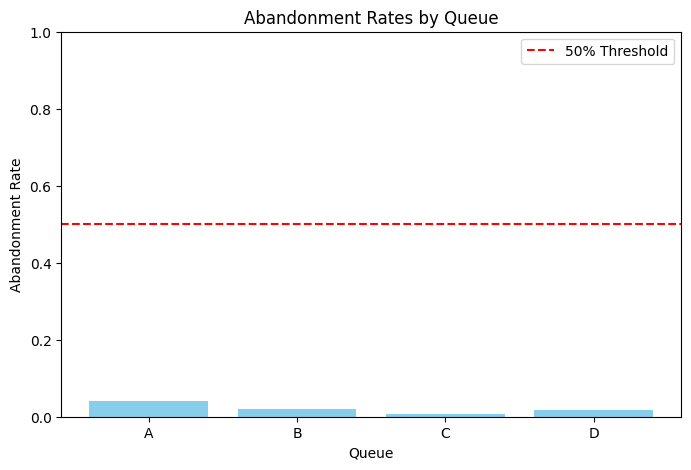

In [193]:
# Create visualization 1 here
# Import any additional libraries needed with alias
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = combined_df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 
    
# Your code below:
plt.figure(figsize=(8, 5))
plt.bar(queues, list(abandonment_rates.values()), color='skyblue')
plt.title('Abandonment Rates by Queue')
plt.xlabel('Queue')
plt.ylabel('Abandonment Rate')
plt.ylim(0, 1)  # Assuming rates are between 0 and 1
plt.axhline(y=0.5, color='r', linestyle='--', label='50% Threshold')  # Optional threshold line
plt.legend()
plt.show()

##### Record your answer below:

> Chart style you chose and why: I chose a bar graph due to that it best reflects the relationship in a way that is easy to see, but also with multiple x-axis it best shows the data changing from A to B, etc.

#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?

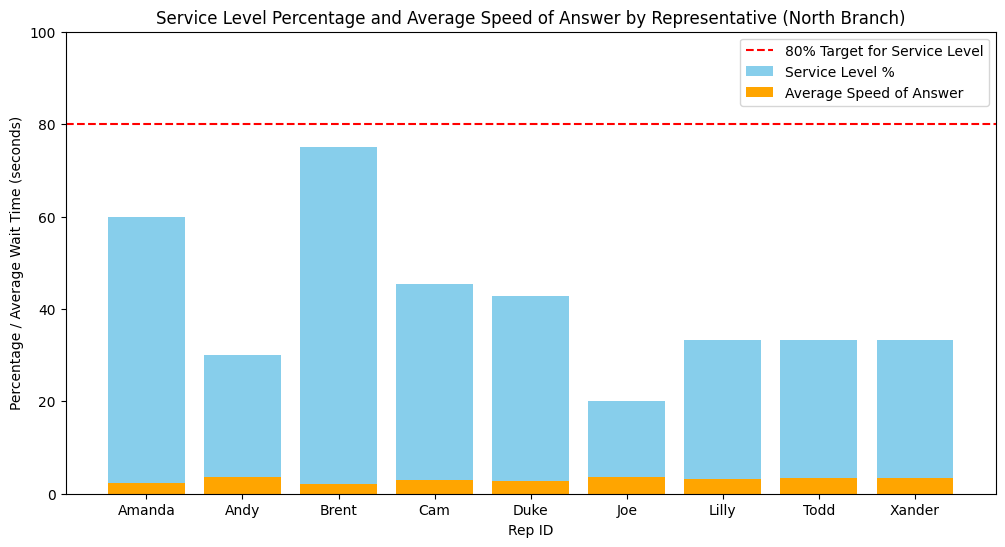

In [194]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep
average_wait_time = north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_df[north_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum().reset_index()  # Final Table

# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_df[north_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]
total_stats = rep_calls.groupby(["Rep ID"]).sum().reset_index() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

#Your Code Here:
#combine them
service_level = pd.merge(service_level, average_wait_time, on="Rep ID", suffixes=('', '_Average'))

#Combined bc
plt.figure(figsize=(12, 6))

# Bar for Service Level Percentage
plt.bar(service_level["Rep ID"], service_level["Service Level %"], color='skyblue', label='Service Level %')

# Average Wait Time
plt.bar(service_level["Rep ID"], service_level["Incoming Wait Time"], color='orange', label='Average Speed of Answer')

# Adding titles and labels
plt.title('Service Level Percentage and Average Speed of Answer by Representative (North Branch)')
plt.xlabel('Rep ID')
plt.ylabel('Percentage / Average Wait Time (seconds)')
plt.ylim(0, 100)  # Adjust the limit based on your data
plt.axhline(y=80, color='r', linestyle='--', label='80% Target for Service Level')  # Optional target line
plt.legend()
plt.show()

##### Record your answer below:

> Chart style you chose and why: I choose bar chart due to the fact that I personally kept running into errors whenever I attempted to create a scatter plot. However since you are looking for the best service and average speed with multiple choices for a Rep, a bar chart simply shows the data across the chart and how it differs from Rep to Rep. It easily reflects the average speed and greatly shows the service differnce.

#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?

Call Purpose     Incoming or Outgoing
Complaint        Incoming                 51
Product Support  Outgoing                228
                 Incoming                 82
Sales Support    Outgoing                123
                 Incoming                 75
Name: count, dtype: int64


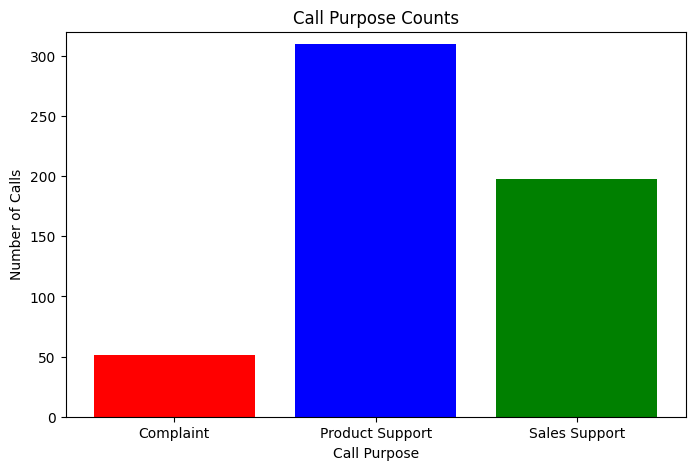

In [195]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_group = combined_df.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
print(purpose_counts)

complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

#Your Code Here:
data = {
    "Call Purpose": call_purpose,
    "Counts": [
        complaints.get("Incoming", 0) + complaints.get("Outgoing", 0),
        product_support.get("Incoming", 0) + product_support.get("Outgoing", 0),
        sales_support.get("Incoming", 0) + sales_support.get("Outgoing", 0)]}
counts_df = pd.DataFrame(data)

plt.figure(figsize=(8, 5))
plt.bar(counts_df["Call Purpose"], counts_df["Counts"], color=['red', 'blue', 'green'])
plt.title('Call Purpose Counts')
plt.xlabel('Call Purpose')
plt.ylabel('Number of Calls')
plt.ylim(0, counts_df["Counts"].max() + 10)  # Adjusting y-limit for better visualization
plt.show()

##### Record your answer below:

> Chart style you chose and why: I choose bar chart, because the question is asking to identify which call category has the most incoming/outgoing calls. The 3 categories can be easily represented and as well as simply reflect the number of calls by category, with no complications.

## Task 5: Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer below:
> Your Answer: 
The South Branch is working more efficently, if you just go based off numbers, they are receiving more calls than the North Branch yet their service level and average call abondenment remain under the 2-5% optimal range company wide.


#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer below:
> Your Answer: 
The North Branch would benefit from hiring more Reps. Their numbers reflect that they would benefit from the having more or an equal amount of like the South Branch.

#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer below:
> Your Answer: If I could have any more data, I would ask for Employee ID numbers to easier identify Rep when sorting, as well as data on any technical issues affecting call quality (e.g., dropped calls, connection issues) would help understand service disruptions, and maybe even historical data for the year, to identify peak season and possibly patterns.

## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer below:

> Chart style you chose and why: 

In [4]:
# Create your Bonus Mission visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot:

NameError: name 'df' is not defined